<a href="https://colab.research.google.com/github/AbishekAmbrose/Simple-Reinforcement-Learning-with-Tensorflow/blob/master/PolicyGradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KeyboardInterrupt: ignored

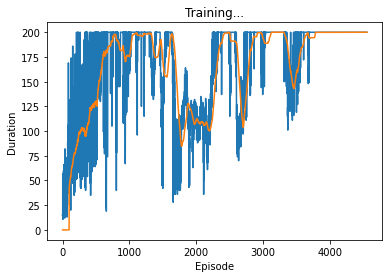

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#import torch.sigmoid as FS
from torch.distributions import Bernoulli
from torch.autograd import Variable
from itertools import count
import matplotlib.pyplot as plt
import numpy as np
import gym
import pdb
#nn.functional.sigmoid

class PolicyNet(nn.Module):
    def __init__(self):
        super(PolicyNet, self).__init__()

        self.fc1 = nn.Linear(4, 24)
        self.fc2 = nn.Linear(24, 36)
        self.fc3 = nn.Linear(36, 1)  # Prob of Left

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x


def main():

    # Plot duration curve: 
    # From http://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
    episode_durations = []
    def plot_durations():
        plt.figure(2)
        plt.clf()
        durations_t = torch.FloatTensor(episode_durations)
        plt.title('Training...')
        plt.xlabel('Episode')
        plt.ylabel('Duration')
        plt.plot(durations_t.numpy())
        # Take 100 episode averages and plot them too
        if len(durations_t) >= 100:
            means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
            means = torch.cat((torch.zeros(99), means))
            plt.plot(means.numpy())
        plt.savefig("./cartpole_reinforce.png")
        #plt.pause(0.001)  # pause a bit so that plots are updated

    # Parameters
    num_episode = 5000
    batch_size = 5
    learning_rate = 0.01
    gamma = 0.99

    env = gym.make('CartPole-v0')
    policy_net = PolicyNet()
    optimizer = torch.optim.RMSprop(policy_net.parameters(), lr=learning_rate)

    # Batch History
    state_pool = []
    action_pool = []
    reward_pool = []
    steps = 0


    for e in range(num_episode):

        state = env.reset()
        state = torch.from_numpy(state).float()
        state = Variable(state)
        #env.render(mode='rgb_array')

        for t in count():

            probs = policy_net(state)
            m = Bernoulli(probs)
            action = m.sample()

            action = action.data.numpy().astype(int)[0]
            next_state, reward, done, _ = env.step(action)
            #env.render(mode='rgb_array')

            # To mark boundarys between episodes
            if done:
                reward = 0

            state_pool.append(state)
            action_pool.append(float(action))
            reward_pool.append(reward)

            state = next_state
            state = torch.from_numpy(state).float()
            state = Variable(state)

            steps += 1

            if done:
                episode_durations.append(t + 1)
                plot_durations()
                break

        # Update policy
        if e > 0 and e % batch_size == 0:

            # Discount reward
            running_add = 0
            for i in reversed(range(steps)):
                if reward_pool[i] == 0:
                    running_add = 0
                else:
                    running_add = running_add * gamma + reward_pool[i]
                    reward_pool[i] = running_add

            # Normalize reward
            reward_mean = np.mean(reward_pool)
            reward_std = np.std(reward_pool)
            for i in range(steps):
                reward_pool[i] = (reward_pool[i] - reward_mean) / reward_std

            # Gradient Desent
            optimizer.zero_grad()

            for i in range(steps):
                state = state_pool[i]
                action = Variable(torch.FloatTensor([action_pool[i]]))
                reward = reward_pool[i]

                probs = policy_net(state)
                m = Bernoulli(probs)
                loss = -m.log_prob(action) * reward  # Negtive score function x reward
                loss.backward()

            optimizer.step()

            state_pool = []
            action_pool = []
            reward_pool = []
            steps = 0


if __name__ == '__main__':
    main()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Bernoulli
from torch.autograd import Variable
from itertools import count
import matplotlib.pyplot as plt
import numpy as np
import gym
import pdb


class PolicyNet(nn.Module):
    def __init__(self):
        super(PolicyNet, self).__init__()

        self.fc1 = nn.Linear(4, 24)
        self.fc2 = nn.Linear(24, 36)
        self.fc3 = nn.Linear(36, 1)  # Prob of Left

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x


def main():

    # Plot duration curve: 
    # From http://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
    episode_durations = []
    def plot_durations():
        plt.figure(2)
        plt.clf()
        durations_t = torch.FloatTensor(episode_durations)
        plt.title('Training...')
        plt.xlabel('Episode')
        plt.ylabel('Duration')
        plt.plot(durations_t.numpy())
        # Take 100 episode averages and plot them too
        if len(durations_t) >= 100:
            means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
            means = torch.cat((torch.zeros(99), means))
            plt.plot(means.numpy())
        plt.savefig("./cartpole_reinforce.png")
        #plt.pause(0.001)  # pause a bit so that plots are updated

    # Parameters
    num_episode = 5000
    batch_size = 5
    learning_rate = 0.01
    gamma = 0.99

    env = gym.make('CartPole-v0')
    policy_net = PolicyNet()
    optimizer = torch.optim.RMSprop(policy_net.parameters(), lr=learning_rate)

    # Batch History
    state_pool = []
    action_pool = []
    reward_pool = []
    steps = 0


    for e in range(num_episode):

        state = env.reset()
        state = torch.from_numpy(state).float()
        state = Variable(state)
        #env.render(mode='rgb_array')

        for t in count():

            probs = policy_net(state)
            m = Bernoulli(probs)
            action = m.sample()

            action = action.data.numpy().astype(int)[0]
            next_state, reward, done, _ = env.step(action)
            #env.render(mode='rgb_array')

            # To mark boundarys between episodes
            if done:
                reward = 0

            state_pool.append(state)
            action_pool.append(float(action))
            reward_pool.append(reward)

            state = next_state
            state = torch.from_numpy(state).float()
            state = Variable(state)

            steps += 1

            if done:
                episode_durations.append(t + 1)
                plot_durations()
                break

        # Update policy
        if e > 0 and e % batch_size == 0:

            # Discount reward
            running_add = 0
            for i in reversed(range(steps)):
                if reward_pool[i] == 0:
                    running_add = 0
                else:
                    running_add = running_add * gamma + reward_pool[i]
                    reward_pool[i] = running_add

            # Normalize reward
            reward_mean = np.mean(reward_pool)
            reward_std = np.std(reward_pool)
            for i in range(steps):
                reward_pool[i] = (reward_pool[i] - reward_mean) / reward_std

            # Gradient Desent
            optimizer.zero_grad()

            for i in range(steps):
                state = state_pool[i]
                action = Variable(torch.FloatTensor([action_pool[i]]))
                reward = reward_pool[i]

                probs = policy_net(state)
                m = Bernoulli(probs)
                loss = -m.log_prob(action) * reward  # Negtive score function x reward
                loss.backward()

            optimizer.step()

            state_pool = []
            action_pool = []
            reward_pool = []
            steps = 0


if __name__ == '__main__':
    main()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.func